# Deep Learning: Coursework 2

------------------------------------------------------

**Student Name:**  Jeremy Dang (Student Number: 17097407  )

**Start date:** *4th March 2019*

**Due date:** *18th March 2019, 09:00 am*

------------------------------------------------------


## How to Submit

When you have completed the exercises and everything has finished running, click on 'File' in the menu-bar and then 'Download .ipynb'. This file must be submitted to Moodle named as **studentnumber_DL_cw2.ipynb** before the deadline above.

Please produce a **pdf** with all the **results** (tables and plots) as well as the **answers** to the questions below. For this assignment, you don't need to include any of the code in the pdf, but answers to the questions should be self-contained and should not rely on a code reference.  Page limit: 15 pg. 

### IMPORTANT
Please make sure your submission includes **all results/answers/plots/tables** required for grading. We should not have to re-run your code.

## Q1: Memory Mechanisms (30 pts)

Before going deeper into your practical tasks, take some time to revise and make sure you understand recurrent models (Vanilla RNN) and the two of major types of recurrent memory cells you will be using in this assignment: Long-Short Term Memory Units (LSTM) first introduced by Hochreiter and Schmidhuber [1997] and the more recent Gated Recurrent Units (GRU) by Cho et al. [2014].

---------------------------------------------------

### Models
For convenience and to standardize notation please use the following notations:

#### Vanilla RNN Model Eq.

A simple RNN model we will be considering here is given by:

$$h_t = \tanh(W_h [h_{t-1}, x_t] + b_h)$$
$$o_t = \sigma(W_o h_t + b_o)$$

#### LSTM Model Eq.

The LSTM models we will be considering are given by: 
* For the input, forget and outputs gates are: 

$$f_t = \sigma(W_f [h_{t-1}, x_t] + b_f)$$
$$i_t = \sigma(W_i [h_{t-1}, x_t] + b_i)$$
$$o_t = \sigma(W_o [h_{t-1}, x_t] + b_o)$$

* The internal state $c_t$ and hidden state $h_t$ are:

$$c_t = f_t * c_{t-1} +  i_t * \text{tanh}(W_c[h_{t-1}, x_t] + b_c) $$
$$h_t = o_t * \text{tanh}(c_t)$$

#### GRU Model Eq.
The GRU models we will be considering are given by:

* The gates modulation $r_t$, $z_t$:
$$z_t = \sigma(W_z [h_{t-1}, x_t] + b_z)$$
$$r_t = \sigma(W_r [h_{t-1}, x_t] + b_r)$$

* The output and hidden state are now being given by:

$$\tilde{h}_t = \text{tanh}(W_h [(h_{t-1} * r_t), x_t] + b_h)$$
$$h_t = (1 - z_t)*\tilde{h}_t + z_t * h_{t-1}$$

---------------------------------
### Simple Memory Task Description
Consider the following memory task: Given an input sequence of $n$ numbers, we would like a system that, after reading this sequence (one number at a time) will always return the first number in the sequence. That is given an input sequence: $(x_1, x_2, \cdots x_n)$, $x_i \in \mathbb{R}$ the system has to return, at time $t=n$ after 'reading' the last input $x_n$, the first input $x_1$.

---------------------------------

###Questions
Now consider the following questions:

1. Given the task above, consider the above recurrent models (RNNs/LSTMs/GRUs). Which of these arhitectures can (theoretically) perfom the task above? In answering this questions, please consider a simple one-layer model of RNNs/GRU/LSTM with a one-dimensional input $x_t$, a $32$-dim hidden and output layer, followed by a transformation to a one-dimensional final output which should predict $x_0$. \\
Whenever the answer is positive, give the gates' activations and weigths that will produce the desired behaviour. Whenever the answer is no, prove that there exists no such parameters that an arbitrary input sequence can be transformed to produce the first symbol read.  [15 pts]

2. How does the answer change when now the desired output, after reading the whole sequence, is the 3rd input $x_3$ rather than $x_1$? Assume here $n>3$. [5 pts]

3. How does the answer change when you restrict the inputs to be integers between $0$ and $31$ and we consider representing these inputs as a one-hot vectors uniquely representing these numbers? That is: for $x_i=0$, the input of the network would be $\tilde{x}=[1,0,0,
\cdots, 0]$, for $x_i=1$, the input of the network would be $\tilde{x}=[0,1,0,0,\cdots, 0]$ and now predicted output should be $\tilde{x}$. [5 pts]

4. Are GRUs a special case of LSTMs? If so, give the expression of the GRU gates in term of LSTM's gates ($o_t, i_t, f_t$). If not, give a counter-example. This is a general question, not specific to the task above, although you can draw intution from the above questions. Assume here the same input. [5 pts]

**Word limit: ** 1500 words or less





**Answers:** 

1) Suppose we have the an input sequence $ [x_1,x_2,...,x_n ] ,  x_i \in \mathbb{R}, i = 1,2,...,n $ and at time $t = n$ the last input $x_n$ we return output $y_t = x_1, t = n$. The vanilla RNN cannot perform this task. The LSTM and GRU models can perform this task.

*   For the vanilla RNN: Given the above sequence, suppose we initialise $h_0 = 0, b_h=b_o = 0$ for the sake of simplicity. The output $o_0 = \sigma(W_oh_0) = \sigma(0)$. At time $t = 1$ and $t=2$ we have the following:

$$h_1 =  \tanh(W_{h}h_0 + W_{h}x_1) = \tanh(W_{h}x_1) \in [-1,1]$$   $$ o_1 = \sigma(W_o\tanh(W_{h}x_1))$$ $$ h_2 = \tanh(W_{h}h_1 + W_{h}x_2) = \tanh( \epsilon + W_{h}x_2) $$$$ o_2 = \sigma(W_o\tanh(\epsilon + W_{h}x_2))$$

>* We therefore see that $\epsilon = W_hh_1 \in [-1,1]$ and when adding this to $W_hx_2$ we see that this value is now centered around sequence element $x_2$ and so the output $o_2$ takes into consideration a value around $x_2$. We have overwritten the first sequence $x_1$  and therefire a vanilla RNN cannot perform this memory task. We repeat this up to $n$ times to and conclude that the vanilla RNN "remembers" the current sequence at some time $t$. To be precise if we define $W_o = W_h = \mathbb{I}$ i.e the identity matrix and $\sigma() = arctanh()$ an $b_h=b_o = 0$ then $o_2 \rightarrow x_2$ 

>* Also during training the vanilla RNN will suffer from vanishing gradients depending on how large the sequence is and therefore we make incorrect predictions as well due to not updating weights as chaining several $tanh()$ functions will tend towards $0$.

* For GRUs: if we set $z_1 =  0 \text{ and } z_t = 1 \text{ } \forall t > 1   \implies h_1 = \tilde{h_1} \text{ and } h_t = h_{t-1}  \text{ } \forall t > 1 $

> * This then implies that the weight matrices $W_z \in \mathbb{R}^{32 \times 33}$ , $W_r \in \mathbb{R}^{32 \times 33}$, $W_h \in \mathbb{R}^{33 \times 32}$  can be set to the following so that we return the first element of the sequence $x_1$:

>> Set $$h_0 << 0$$ $$0 << b_z < -h_0 $$ $$W_z = 1$$ $$ W_r = 1$$ $$W_h = [0_{32 \times 32}, 1_{32 \times 1}]$$ $$b_r << 0$$  $$ b_h = 0 $$ Now at $t=1$ putting it all together we get $$z_1 = \sigma(W_z [h_{0}, x_1] + b_z) \rightarrow 0 $$ $$r_1 = \sigma(W_r [h_{0}, x_1] + b_r) \rightarrow 0$$ $$ \tilde{h_1} = \tanh(W_h[0,x_1] + b_h) = \tanh(W_h[0,x_1]) = \tanh(x_1)$$ $$ h_1 = \tilde{h_1} $$

>> Therefore at time $t = 2$ : $z_2 = \sigma(W_z[h_1,x_2] + b_z) \rightarrow 1$ due to saturation caused by the conditions we have set by  $b_z$ and therefore $$h_2 = h_1 = \tilde{h_1} = \tanh(x_1)$$

>> We just need to apply $arctanh()$ to return our element. Chaining this up to time $t = T $ we have we still have $h_T = \tilde{h_1}$ and so GRU can solve our memory task.


*   For the LSTM: LSTMs overcome the problem which a vanilla RNN has - which is the vanishing/exploding gradient problem. For LSTM's we can do something similar to GRU's by setting specific weights and biases to saturate the gates. We can set the following initialisations, weights and biases:

$$ h_o << 0 $$ $$ W_f =1 \in \mathbb{R}^{32 \times 33} $$ $$ 0 << b_f << -h_0 $$ 

>* The initialisations implies that 
$$ f_1  = \sigma(W_f[h_0,x_1] +b_f) \rightarrow 0 $$ 
$$ f_{t}  = \sigma(W_f[h_{t},x_1] +b_f) \rightarrow 1, t > 1$$ 

>*  Let $ W_i << 0 \in \mathbb{R}^{32 \times 33} \text{ and } b_i = 0 \implies i_t \rightarrow 1 \text{ for } t = 1, 0 \text{ otherwise.}$ 

>* Let $ W_o = -1 \in \mathbb{R}^{32 \times 33} \text{ and } b_i = 0 \implies o_t \rightarrow 1 \text{ for } \forall t$

>* Let $ W_c = [0_{32 \times 32}, 1_{1 \times 32]} \in \mathbb{R}^{32 \times 33} \text{ and } b_c = 0 \implies c_1 \rightarrow \tanh(x_1)  \implies c_t \rightarrow c_1 \forall t $
 

2) It means that we need to adjust the gates of LSTM and GRU so that we remember the third sequence so that all by updating our state values and for time $t > 3$ we set the gates so that we carry on what we have remembered at time $t = 3$ so that we predict the third element of the sequence. Therefore we need to construct the weights and biases in a specific manner to achieve this, theoretically this is possible.

> - For LSTM, we do not want the LSTM to remember the variables $h_0,c_0,c_1,c_2$  for $t<3$ so this means that we set them to $0$. On time $t = 3$ set the parameters such that $f_3 = 0$ and $i_3 = o_3 = 1$ i.e saturating the gates so that we return what we need (see GRU/LSTM proof for $x_1$).

>- For GRU, when $t<3$ we don't want to remember the variables $h_0,h_1,h_2$ so we set them to $0$ and set parameters in $h_3$ such that we saturate $z_3 = 0$. Subsequently for time $t > 3$ we saturate the update gate  to one meaning $z_t = 1 $ while keeping the parameters of the gate the same as the previous proofs.

3) All 3 models can do this task this is because we effectively added a one-hot encoding to the integers we'd like to predict and so when we feed this vector into the RNN we are trying to predict the position in the 32 dimensional vector where the position in the vector is binary and would represent an integer between $0$ and $31$.

>- For RNN:  Set $o_t = 1$ with the weights to be some large identity matrix to return $x_t$ and the bias to be zero. We also set weights and biases of the hidden state to be zero to achieve what we want.

>- For LSTM: Set $f_t = 0$ (set $W_f = 0, b_f = 0$ ) and $i_t = o_t = 1$ such that we simplify the cell state $c_t$ (set $W_o = W_c = 0$, $b_i >>0, b_o >>0$ on the $t$th position to ensure gate saturation). 

>- For GRU: Set  $z_t = r_t = 0 \implies W_z = W_r = b_r = b_z = 0$ so that $h_t = \tilde{h_t}$. Then set $
 b_h =0$ and $W_h$ to be a very large identity matrix.
 
4) Simple answer is **no**, GRU's are not a special case of LSTMs (though they are similar!). The reason for this is that a GRU can control how much information to pass on/forget in the reset gate whereas an LSTM cannot. Therefore a GRU is not a special case of an LSTM. A counter example is the following (assume the same notation as defined in the question):

Suppose we set an GRU with the following parameters: 

>- $$z_t = r_t = 1 \implies h_t = h_{t-1}$$

Suppose we set the LSTM with the following parameters and apply parameters of the GRU:

>- $$ o_t = r_t, \text{ } i_t = 1 - z_t, \text{ }  f_t = z_t \implies o_t = 1,\text{ }  i_t = 0,\text{ } f_t = 1 $$

>- Under the assumptions of the GRU the hidden state $h_t$ is the following for the LSTM:

$$ h_t = \tanh(c_{t}) \neq h_{t-1}$$

>- LSTM has a non-linearity in the hidden state which always transforms the variable $c_t$ and as a result we can't recover $h_{t-1}$ as we could in the GRU case without applying more assumptions. 


In [0]:
#@title IMPORTS
import tensorflow as tf
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

## Q2: Training Memory Models (33 pts)
Let us now investigate in pratice the above problem. And see how each these models does in learning the simple memory task proposed in Q1. For the purposed of this exercise we consider as inputs sequences of length $n=10$, with every input $x_i \sim \mathcal{N(0,1)}$ drawn (independently) from a unit Gaussian.


1. **[5 pts]** Consider one of the models in **Q1.1** that you now know can represent a solution to our simple memory task. For this model, you know at least one set of weights what should implement exactly the prediction of the first read symbol $x_1$. Implement this model in tensorflow, with the fixed set of weights you previously inferred and show emperically that this indeed solves our task. \\
  i) Report the (empirical) mean-squared error over $300$ randomly generated sequences. \\
  ii) Is this set of weights a fix point for the learning? 

**Answers:**

* 1i) Here I've implemented a GRU and reported the MSE over 300 randomly generated sequences to be $ 3.71e^{-30} $ which means that the GRU managed to remember the the first element of the generated sequence since the difference between square different of actual vs predicted is small.

* 1ii) Yes, I have set $W_z = W_r = 0, W_c = 1$




In [2]:
class GRU_21:
  
  def __init__(self, input_dimensions, hidden_size, dtype=tf.float64):
    
    # Initialise dimensions of the input and the hidden units
    self.input_dimensions = input_dimensions
    self.hidden_size = hidden_size
        
    # Initialise weights of reset, update and hidden states
    self.Wr = tf.zeros(shape= (self.input_dimensions, self.hidden_size), name='Wr',dtype=tf.float64)
    self.Wz = tf.zeros(shape=(self.input_dimensions, self.hidden_size),name = 'Wz',dtype=tf.float64)     
    self.Wh = tf.ones(shape=(self.input_dimensions, self.hidden_size),name = 'Wh',dtype=tf.float64)
       
    # Set unit matric to help overcome concatenation of x_i's
    self.Ur = tf.zeros(shape= (self.hidden_size, self.hidden_size), name='Ur',dtype=tf.float64)
    self.Uz = tf.eye(hidden_size,name = 'Uz',dtype=tf.float64)
    self.Uh = tf.zeros(shape= (self.hidden_size, self.hidden_size), name='Uh',dtype=tf.float64)
        
    # Initialise vector of biases of size of hidden units
    self.br = -50.0 *tf.ones(shape = (self.hidden_size,), name='br',dtype=tf.float64)
    self.bz = 50.0 *tf.ones(shape= (self.hidden_size,), name='bz',dtype=tf.float64)
    self.bh = tf.zeros(shape= (self.hidden_size,), name='bh',dtype=tf.float64)
        
    # Define the input layer placeholder
    self.input_layer = tf.placeholder(dtype=tf.float64, shape=(None, None, input_dimensions), name='input')
        
    # Put the time-dimension upfront for the scan operator, hence transposed xt is of shape (n, batch_num, input_dimensions)

    self.x_t = tf.transpose(self.input_layer, [1, 0, 2], name='x_t')
    
    # Initialise h_0 
    self.h_0 = tf.matmul((self.x_t[0, :, :]) , tf.zeros(dtype=tf.float64, shape=(input_dimensions, hidden_size))) - 2000.0
        
    # Perform the scan operator to return sequence of hidden states
    self.h_t_transposed = tf.scan(self.forward_pass, self.x_t, initializer=self.h_0, name='h_t_transposed')
        
    # Transpose the result back
    self.h_t = tf.transpose(self.h_t_transposed, [1, 0, 2], name='h_t')

        
  def forward_pass(self, h_tm1, x_t):
        # Apply formula of update gate and relevance gate

        z_t = tf.sigmoid(tf.matmul(h_tm1, self.Uz) + self.bz)
        r_t = tf.sigmoid(tf.matmul(x_t, self.Wr) + tf.matmul(h_tm1, self.Ur) + self.br)
        
        # Definition of h~_t
        h_proposal = tf.tanh(tf.matmul(x_t, self.Wh) + tf.matmul(tf.multiply(r_t, h_tm1), self.Uh) + self.bh)
        
        # Compute the next hidden state
        h_t = tf.multiply((1.0 - z_t), h_proposal) + tf.multiply(z_t, h_tm1)
               
        return h_t

def predict_first_word(h):
  h = tf.transpose(h,[1, 0, 2]) #so now sequence size is put as first element
  W_f = np.ones((32,1))*(1/32.0) 
  #predict with the last hidden layer for each sequence. 
  predict = tf.math.atanh(tf.matmul(h[-1,:,:],W_f)) 
  return predict


# The input has 2 dimensions: dimension 0 is reserved for the first term and dimension 1 is reverved for the second term
def GRU_Out(X_test, Y_test):

  time_size,batch_size = X_test.shape[1],X_test.shape[0]
  
  input_dimensions = 1

  # Arbitrary number for the size of the hidden state
  hidden_size = 32

  # Initialize a session
  session = tf.Session()

  # Create a new instance of the GRU model
  gru = GRU_21(input_dimensions, hidden_size)

  # Add an additional layer on top of each of the hidden state outputs
  output = predict_first_word(gru.h_t)
 
  # Create a placeholder for the prediction
  expected_output = tf.placeholder(dtype=tf.float64, shape=(batch_size, 1), name='expected_output')

  # loss is MSE
  loss = tf.reduce_sum( tf.pow(output - expected_output, 2)) / float(batch_size)
  test_output= session.run([output], feed_dict={gru.input_layer: X_test, expected_output: Y_test})
  test_loss = session.run([loss], feed_dict={gru.input_layer: X_test, expected_output: Y_test})
  
  return test_output,test_loss

from numpy import array, random
import numpy as np

length = 20
seq = random.randn(300,length)
X = seq.reshape(300,length,1) 
y = X[:,0,:]

test_output,test_loss = GRU_Out(X, y)
print('mean square error over 300 sequences =',test_loss)

Instructions for updating:
Colocations handled automatically by placer.
mean square error over 300 sequences = [3.7093183385156065e-30]


2. **[10 pts] ** Consider the following models, with standard initializations (tensorflow defaults), except a few bias terms as specified below:
  * MM1: RNN bias term $b_h = 0$
  * MM2: LSTM with $b_f = 1$ 
  * MM3: LSTM with $b_f = 5$
  * MM4: LSTM with $b_f = -2$
  * MM5: GRU with  $b_z = 5$

  Implement each of these models in tensorflow. Given the initialization conditions above, compute and plot the following gradients as a function of time: the gradient of the last hidden unit $h_T$, where $T=n$ which respect to the previous hidden units $h_t$ for $t < T$.

  $$ \left\Vert \frac{\partial h_T}{\partial h_t} \right\Vert_1 = \sum_i \left| \frac{\partial h_T[i]}{\partial h_t} \right|$$  
  and the gradient of the loss which respect to the hidden units over time $h_t$, for $t<T$:
    $$ \left\Vert \frac{\partial Loss}{\partial h_t} \right\Vert_1$$  
where the $Loss$ we are considering here is the mean-squares error: $Loss(\textbf{x}) = (x_1-y_T)^2$ where $y_T$ is the output of the reccurent model at time $T=n$ after reading the last input $x_n$.

  **[3 pts] ** Now consider an additional model:
  * MM0: LSTM with $b_f = 1000$ and $b_c = -50$. 

  Report and plot the same gradients as above. What do you observe? What does this model correspond to? (Hint: How does the information flow when processing a sequence). What will be its behaviour in training?

  **[5 pts] ** Increase the length of the input sequence to $n=25$. How do the above gradients change? (you can see by an argument or by running the experiments and explain what you see). How do you expect the training to progress in all of these models MM0-5?  

**Answers:**

* 2) **[10pts]** See below for implementation

* 3) **[3pts]**  Information flows during processing is that because we have $b_f = 1000$ and $b_c = -50$ which therefore saturates the activation functions of $f_t$ and within $tanh(W_c[h_{t-1}, x_t] + b_c)$ and we therefore what the LSTM is doing is recalling the most recent information rather than preserving information. Behaviour in training is constant and shows no sign of convergence but rather stuck on a constant line.

* 4) **[5 pts]** Compared to the sequence of length 10 we can see that all but MM3 (MM0 being flat) converge to some value. MM3 highlights how significant exploding gradients are when we increase the sequence length. When training these models I am therefore expecting MM0,1,2,4,5 to converge and MM3 to not converge.

In [0]:
class RNN(object):
  def __init__(self, hidden_num, num_inputs, bf_init):
    self.num_inputs = num_inputs
    with tf.variable_scope('layer_1'):

      # Initialise weights and biases for hidden states
      self.w_h = tf.get_variable("w_h", 
                                       dtype=tf.float32, 
                                       shape=[hidden_num , hidden_num + 1],
                                       initializer = tf.contrib.layers.xavier_initializer())
      
      self.b_h = tf.math.scalar_mul(bf_init,
                                         tf.get_variable("b_h",
                                         dtype=tf.float32, 
                                         shape=[hidden_num,1],
                                         initializer = tf.keras.initializers.Ones()))
      
      self.h_tminus1 = tf.get_variable("h_tminus1",
                                       dtype=tf.float32, 
                                       shape=[hidden_num,1],
                                       initializer = tf.keras.initializers.Zeros())
      
      # Initialise weights and biases for output
      self.w_o = tf.get_variable("w_o", 
                                       dtype=tf.float32, 
                                       shape=[hidden_num, hidden_num], 
                                       initializer = tf.contrib.layers.xavier_initializer())

      self.b_o = tf.get_variable("b_o",
                                      dtype=tf.float32, 
                                      shape=[hidden_num,1],
                                      initializer = tf.keras.initializers.Ones)
      
  def forward_pass(self, previous_h, x_curr):
      self.h_tminus1 = tf.keras.activations.tanh(tf.matmul(self.w_h,
                                                           tf.concat([previous_h,x_curr],0)) + self.b_h)
      
      out =  tf.keras.activations.sigmoid(tf.matmul(self.w_o,self.h_tminus1)+self.b_o)
      
      return out
    
  def output(self, x):
    hidden = []
    output = []

    for time_step in range(len(x)):
      output.append(tf.transpose(self.forward_pass(self.h_tminus1, x[time_step])))
      hidden.append(self.h_tminus1)
    return output, hidden
  
class LSTM(object):
  def __init__(self, hidden_num, num_inputs, bf_init, bi_init, bo_init, bc_init, name):
    self.num_inputs = num_inputs
    
    with tf.variable_scope(name):
      self.h_tminus1 = tf.get_variable("h_tminus1",
                                       dtype=tf.float32, shape=[hidden_num,1], 
                                       initializer = tf.keras.initializers.Zeros())
      
      self.c_tminus1 = tf.get_variable("c_tminus1",
                                               dtype=tf.float32, shape=[hidden_num,1],
                                               initializer = tf.keras.initializers.Zeros())
      
      # Initialise forget gate parameters
      
      self.w_f = tf.get_variable("w_f", 
                                       dtype=tf.float32, 
                                       shape=[hidden_num , hidden_num + 1],
                                       initializer = tf.contrib.layers.xavier_initializer())
   
      self.b_f = tf.math.scalar_mul(bf_init, tf.get_variable("b_f",
                                                                  dtype=tf.float32, 
                                                                  shape=[hidden_num,1],
                                                                  initializer = tf.keras.initializers.Ones()))
      # Initialise input gate parameters
      self.w_i = tf.get_variable("w_i", 
                                       dtype=tf.float32, 
                                       shape=[hidden_num , hidden_num + 1],
                                       initializer = tf.contrib.layers.xavier_initializer())

      self.b_i = tf.math.scalar_mul(bi_init,tf.get_variable("b_i",
                                                            dtype=tf.float32, 
                                                            shape=[hidden_num,1],
                                                            initializer = tf.keras.initializers.Ones))
      # Initialise output gate parameters
      self.w_o = tf.get_variable("w_o", 
                                       dtype=tf.float32, 
                                       shape=[hidden_num, hidden_num+1], 
                                       initializer = tf.contrib.layers.xavier_initializer())
      #offset
      self.b_o = tf.math.scalar_mul(bo_init,tf.get_variable("b_o",
                                                             dtype=tf.float32, 
                                                             shape=[hidden_num,1],
                                                             initializer = tf.keras.initializers.Ones))
      # cell
      self.w_c = tf.get_variable("w_c", 
                                 dtype=tf.float32, 
                                 shape=[hidden_num , hidden_num + 1],
                                 initializer = tf.contrib.layers.xavier_initializer())
      #
      self.b_c = tf.math.scalar_mul(bc_init,
                                    tf.get_variable("b_c", 
                                                    dtype=tf.float32, 
                                                    shape=[hidden_num,1],
                                                    initializer = tf.keras.initializers.Ones))
      
  def forward_pass(self, previous_h, x_t):
    
      f = tf.keras.activations.sigmoid(tf.matmul(self.w_f,
                                                 tf.concat([previous_h,x_t],0))+self.b_f)
      
      i = tf.keras.activations.sigmoid(tf.matmul(self.w_i,
                                                 tf.concat([previous_h,x_t],0))+self.b_i)
      
      o = tf.keras.activations.sigmoid(tf.matmul(self.w_o,
                                                 tf.concat([previous_h,x_t],0))+self.b_o)
      
      c_prop = tf.keras.activations.tanh(tf.matmul(self.w_c,
                                                   tf.concat([previous_h,x_t],0))+self.b_c)
      
      self.c_tminus1 = tf.einsum('ij,ij->ij', f, self.c_tminus1) + tf.einsum('ij,ij->ij', i, c_prop)
      self.h_tminus1 = tf.einsum('ij,ij->ij', o, tf.keras.activations.tanh(self.c_tminus1))

      return self.h_tminus1
    
  def output(self,x):
    hidden = []
    output = []

    for time_step in range(len(x)):
      output.append(tf.transpose(self.forward_pass(self.h_tminus1 ,x[time_step])))
      hidden.append(self.c_tminus1)
    return output, hidden
  
class GRU():
  def __init__(self, hidden_num, num_inputs, bz_init, br_init, bh_init, name):
    self.num_inputs = num_inputs
    with tf.variable_scope(name):
      
      
      self.h_tminus1 = tf.get_variable("h_tminus1",
                                       dtype=tf.float32, 
                                       shape=[hidden_num,1],
                                       initializer = tf.keras.initializers.Zeros())
      
      # Initialise update gate parameters
      self.w_z = tf.get_variable("w_z", 
                                       dtype=tf.float32, 
                                       shape=[hidden_num , hidden_num + 1],
                                       initializer = tf.contrib.layers.xavier_initializer())

      self.b_z = tf.math.scalar_mul(bz_init,
                                         tf.get_variable("b_z",
                                                         dtype=tf.float32, 
                                                         shape=[hidden_num,1],
                                                         initializer = tf.keras.initializers.Ones()))
      # Initialise relevance gate parameters
      self.w_r = tf.get_variable("w_r", 
                                 dtype=tf.float32, 
                                 shape=[hidden_num , hidden_num + 1],
                                 initializer = tf.contrib.layers.xavier_initializer())
      
      self.b_r = tf.math.scalar_mul(br_init,
                                    tf.get_variable("b_r",dtype=tf.float32, 
                                                    shape=[hidden_num,1],
                                                    initializer = tf.keras.initializers.Ones))                          
      # Initialise hidden state parameters
      self.w_h = tf.get_variable("w_h", 
                                 dtype=tf.float32, 
                                 shape=[hidden_num, hidden_num+1],
                                 initializer = tf.contrib.layers.xavier_initializer())

      self.b_h = tf.math.scalar_mul(bh_init,
                                    tf.get_variable("b_h",
                                                    dtype=tf.float32, 
                                                    shape=[hidden_num,1],
                                                    initializer = tf.keras.initializers.Ones))

  def forward_pass(self, previous_h, x_t):
      z = tf.keras.activations.sigmoid(tf.matmul(self.w_z,
                                                 tf.concat([previous_h,x_t],0))+self.b_z)
      
      r = tf.keras.activations.sigmoid(tf.matmul(self.w_r,
                                                 tf.concat([previous_h,x_t],0))+self.b_r)
      
      h_prop = tf.keras.activations.tanh(tf.matmul(self.w_h,
                                                   tf.concat([tf.einsum('ij,ij->ij',previous_h,r),x_t],0))+self.b_h)
      self.h_tminus1 = tf.einsum('ij,ij->ij',tf.ones(tf.shape(z))-z, h_prop) + tf.einsum('ij,ij->ij',z,self.h_tminus1)
      return h_prop
    
  def output(self,x):
    hidden = []
    output = []
    for time_step in range(len(x)):
      hidden.append((self.forward_pass(self.h_tminus1,x[time_step])))
      output.append(tf.transpose(self.h_tminus1))
    return output, hidden


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


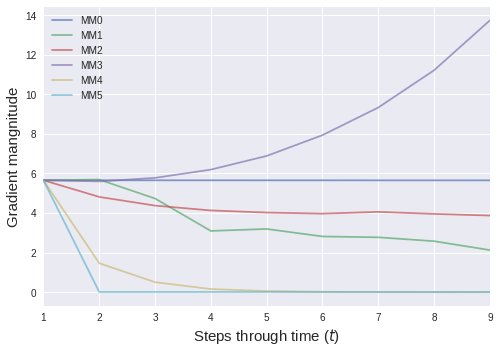

In [4]:
tf.reset_default_graph()

SEQ_LENGTH = 10 #@param
HIDDEN_UNITS = 32 #@param
index_input_to_remember = 1 #@param
derivative = 'Losss' #@param

# dummy input sequence
dummy_input = [tf.constant([[np.random.normal()]]) for _ in range(SEQ_LENGTH)] 

rnn_types = {
    'MM0': LSTM(HIDDEN_UNITS,SEQ_LENGTH,1000,0,-5,0,'zero'),
    'MM1': RNN(HIDDEN_UNITS,SEQ_LENGTH,0),
    'MM2': LSTM(HIDDEN_UNITS,SEQ_LENGTH,1,0,0,0,'first'),
    'MM3': LSTM(HIDDEN_UNITS,SEQ_LENGTH,5,0,0,0,'second'),
    'MM4': LSTM(HIDDEN_UNITS,SEQ_LENGTH,-2,0,0,0,'third'),
    'MM5': GRU(HIDDEN_UNITS,SEQ_LENGTH,5,0,0,'fourth')
}

depths = {rnn_type: [] for rnn_type in rnn_types} # [9, 8, 7, 6, 5, 4, 3, 2, 1]
grad_norms = {rnn_type: [] for rnn_type in rnn_types}

for rnn_type in rnn_types:

  # --------------------------------------
  # Construct model rnn_types[rnn_type]
  model = rnn_types[rnn_type]
  outputs, hidden = model.output(dummy_input)

  # --------------------------------------
  # Pass input and unroll in time. 
  # i) Record the intermediate hidden states $h_i$ in rnn_hidden_at_time
  rnn_hidden_at_time = hidden
  # ii) Record the last hidden unit and the last output on which we are going to 
  # make the prediction
  last_hidden = hidden[-1]
  hidden_last_output = outputs[-1]
  
  # Transformation of the RNN output into prediction
  w = tf.Variable(tf.contrib.layers.xavier_initializer()([HIDDEN_UNITS, 1]))
  b = tf.Variable(tf.contrib.layers.xavier_initializer()([1]))
  model_output = tf.matmul(hidden_last_output, w) + b

  loss = tf.reduce_mean(
    tf.square(model_output-dummy_input[index_input_to_remember]))

  gradients_at_time = []
  for i in range(1, SEQ_LENGTH):
    if derivative == 'loss':
      current_gradient = tf.gradients(
        loss, 
        rnn_hidden_at_time[i],   
      )
    else:
      current_gradient = tf.gradients(
        last_hidden, 
        rnn_hidden_at_time[i],   
      )
    gradients_at_time.append(current_gradient)

  
  init = tf.global_variables_initializer()  
  with tf.train.SingularMonitoredSession() as sess:
    sess.run(init)
    gradients = sess.run(gradients_at_time)

  for gid, grad in enumerate(gradients):
    depths[rnn_type].append(len(gradients)-gid)    
    grad_norms[rnn_type].append(np.linalg.norm(grad))

plt.figure()
for rnn_type in depths:
  plt.plot(depths[rnn_type], grad_norms[rnn_type],
           label="%s" % rnn_type, alpha=0.7)
plt.legend()  
plt.ylabel("Gradient mangnitude", fontsize=15)
plt.xlabel("Steps through time ($t$)", fontsize=15)
plt.xlim((1, SEQ_LENGTH-1))
plt.show()

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


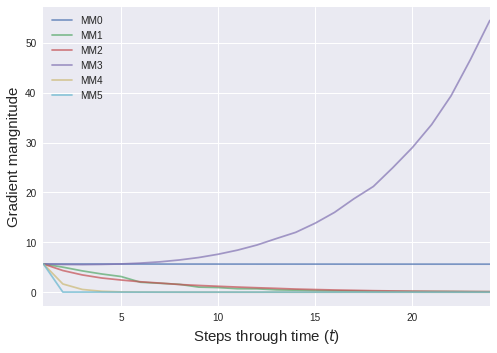

In [5]:
tf.reset_default_graph()

SEQ_LENGTH = 25 #@param
HIDDEN_UNITS = 32 #@param
index_input_to_remember = 1 #@param
derivative = 'Losss' #@param

# dummy input sequence
dummy_input = [tf.constant([[np.random.normal()]]) for _ in range(SEQ_LENGTH)] 

rnn_types = {
    'MM0': LSTM(HIDDEN_UNITS,SEQ_LENGTH,1000,0,-5,0,'zero'),
    'MM1': RNN(HIDDEN_UNITS,SEQ_LENGTH,0),
    'MM2': LSTM(HIDDEN_UNITS,SEQ_LENGTH,1,0,0,0,'first'),
    'MM3': LSTM(HIDDEN_UNITS,SEQ_LENGTH,5,0,0,0,'second'),
    'MM4': LSTM(HIDDEN_UNITS,SEQ_LENGTH,-2,0,0,0,'third'),
    'MM5': GRU(HIDDEN_UNITS,SEQ_LENGTH,5,0,0,'fourth')
}

depths = {rnn_type: [] for rnn_type in rnn_types} # [9, 8, 7, 6, 5, 4, 3, 2, 1]
grad_norms = {rnn_type: [] for rnn_type in rnn_types}

for rnn_type in rnn_types:

  # --------------------------------------
  # Construct model rnn_types[rnn_type]
  model = rnn_types[rnn_type]
  outputs, hidden = model.output(dummy_input)

  # --------------------------------------
  # Pass input and unroll in time. 
  # i) Record the intermediate hidden states $h_i$ in rnn_hidden_at_time
  rnn_hidden_at_time = hidden
  # ii) Record the last hidden unit and the last output on which we are going to 
  # make the prediction
  last_hidden = hidden[-1]
  hidden_last_output = outputs[-1]
  
  # Transformation of the RNN output into prediction
  w = tf.Variable(tf.contrib.layers.xavier_initializer()([HIDDEN_UNITS, 1]))
  b = tf.Variable(tf.contrib.layers.xavier_initializer()([1]))
  model_output = tf.matmul(hidden_last_output, w) + b

  loss = tf.reduce_mean(
    tf.square(model_output-dummy_input[index_input_to_remember]))

  gradients_at_time = []
  for i in range(1, SEQ_LENGTH):
    if derivative == 'loss':
      current_gradient = tf.gradients(
        loss, 
        rnn_hidden_at_time[i],   
      )
    else:
      current_gradient = tf.gradients(
        last_hidden, 
        rnn_hidden_at_time[i],   
      )
    gradients_at_time.append(current_gradient)

  
  init = tf.global_variables_initializer()  
  with tf.train.SingularMonitoredSession() as sess:
    sess.run(init)
    gradients = sess.run(gradients_at_time)

  for gid, grad in enumerate(gradients):
    depths[rnn_type].append(len(gradients)-gid)    
    grad_norms[rnn_type].append(np.linalg.norm(grad))

plt.figure()
for rnn_type in depths:
  plt.plot(depths[rnn_type], grad_norms[rnn_type],
           label="%s" % rnn_type, alpha=0.7)
plt.legend()  
plt.ylabel("Gradient mangnitude", fontsize=15)
plt.xlabel("Steps through time ($t$)", fontsize=15)
plt.xlim((1, SEQ_LENGTH-1))
plt.show()

 3. **[10 pts]** Based on the intuitions in the last questions, pick two models (one GRU model, one LSTM model) to train the simple memory task of remembering the first input of a sequence.
   * Explain your choice of models and initializations.
   * Train your models on this task and plot your train and testing loss (mean-sq. error).
   * Report (test) accuracy at end of training.
    * Comment on the results you obtained. What happens if we were to increase $n$? What we happen if we trained longer? What if we were trying to predict the $3rd$ symbol read?

  **Inputs**: $\textbf{x} = (x_1, x_2, ..., x_n)$ where $x_i \sim \mathcal{N(0,1)}$ (independently drawn) \\

  **Output (expected)**: $x_1$

  **Training**: 
    * Data: Generate $32*200$ random sequences of length $n=5$ for training and $256$ ones for testing.  
    * Recommended hyperparameters: learning rate $lr=1e-3$, minibatch size = $32$, optimizer = Adam. (Feel free to manipulate these to get the best performance).
 

**Answers:**

In [6]:
number_train = 32*200
train_xs = np.random.randn(number_train,5)
test_xs = np.random.randn(256,5)

from keras.layers import Activation
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects

def activation(x):
    return tf.math.atanh(x)

get_custom_objects().update({'custom_activation': Activation(activation)})

GRU_ = tf.keras.models.Sequential()
GRU_.add(tf.keras.layers.GRU(32, input_shape = (5,1),
    activation='tanh',
    recurrent_activation='sigmoid',
    use_bias=True,
    kernel_initializer='glorot_uniform',
    recurrent_initializer='orthogonal',
    bias_initializer='glorot_uniform',
    implementation=1
   ))

GRU_.add(tf.keras.layers.Dense(1, activation=None, use_bias=False))

GRU_.compile(loss = 'mse', optimizer='adam', metrics=['mse'])

hist_GRU = GRU_.fit(np.reshape(train_xs, (-1,5,1)),
                          train_xs[:,0], 
                          validation_data=(np.reshape(test_xs, (-1,5,1)),
                                           test_xs[:,0]),
                          batch_size=32,
                          epochs=20,
                          shuffle=True)

LSTM_ = tf.keras.models.Sequential()

LSTM_.add(tf.keras.layers.LSTM(32, input_shape = (5,1),
    activation='tanh',
    recurrent_activation='hard_sigmoid',
    use_bias=True,
    kernel_initializer='glorot_uniform',
    recurrent_initializer='orthogonal',
    bias_initializer='zeros',
    unit_forget_bias=True,
    implementation=1
   ))

LSTM_.add(tf.keras.layers.Dense(1,
                                   activation=None,
                                   use_bias=False))
LSTM_.compile(loss = 'mse', 
                 optimizer='adam',
                 metrics=['mse'])

hist_LSTM = LSTM_.fit(np.reshape(train_xs, (-1,5,1)),
                            train_xs[:,0], 
                            validation_data=(np.reshape(test_xs,(-1,5,1)),
                                             test_xs[:,0]),
                            batch_size=32,
                            epochs=20,
                            shuffle=True)


Using TensorFlow backend.


Instructions for updating:
Use tf.cast instead.
Train on 6400 samples, validate on 256 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
6400/6400 [==============================] - 5s 804us/sample - loss: 0.5045 - mean_squared_error: 0.5045 - val_loss: 0.0939 - val_mean_squared_error: 0.0939
Epoch 2/20
6400/6400 [==============================] - 2s 379us/sample - loss: 0.0421 - mean_squared_error: 0.0421 - val_loss: 0.0174 - val_mean_squared_error: 0.0174
Epoch 3/20
6400/6400 [==============================] - 2s 387us/sample - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0058 - val_mean_squared_error: 0.0058
Epoch 4/20
6400/6400 [==============================] - 2s 381us/sample - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 5/20
6400/6400 [==============================] - 2s 386us/sample - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 6/20
6400/6

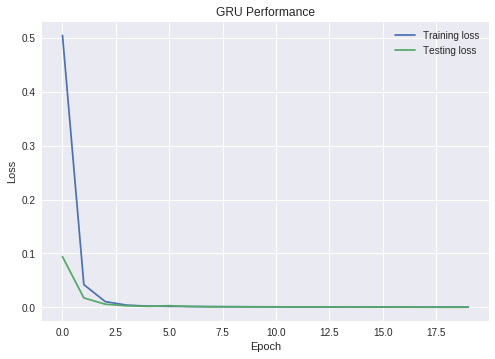

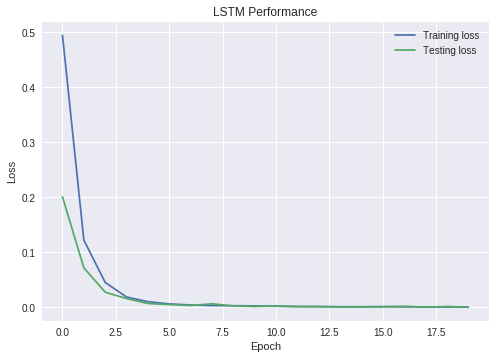

In [7]:
  plt.plot(hist_GRU.history['loss'])
  plt.plot(hist_GRU.history['val_loss'])

  plt.title('GRU Performance')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training loss','Testing loss'], loc='upper right')
  plt.show()
  plt.plot(hist_LSTM.history['loss'])
  plt.plot(hist_LSTM.history['val_loss'])
  plt.title('LSTM Performance')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training loss', 'Testing loss'], loc='upper right')
  plt.show()

## Q3: Meta-learning via LSTM-s (37 pts)
(Credits to Pedro Ortega for insipring the task and insights behind it)

### Task Description

Consider the following generative model: 
* We have $4$ symbols that will be generates from a multinomial/categorical distribution, with parameters $\textbf{p}=(p_1, p_2, p_3)$: symbol 1 is generated with probability $p_1$, symbol 2 is generated with probability $p_2$, symbol 3 with probability $p_3$.
$$X \sim Categorical(3, \textbf{p})$$

* The parameter vector $\textbf{p}$ is drawn from a Dirichlet prior: $$\textbf{p} \sim Dirichlet(\alpha)$$

We are going to use the above to generate sequences (a continuous stream of data/observations), in the following way:
* Step 1: We sample $\textbf{p}$ from the prior
* Step 2: Given this $\textbf{p}$, for $T-1$ time-steps we will generate i.i.d observations by sampling one of the $4$ symbols from the categorical distribution induced by $\textbf{p}$
$$ (X_1, X_2, \cdots X_{T-1}) , s.t. X_i \sim Categorical(3, \textbf{p})$$
* Step 3: At the end of the sequence we append a fourth symbol (RESET): $(X_1, X_2, \cdots X_T, RESET)$
* Step 4: Return to Step 1 and resample $\textbf{p}$. 
* Repeat this 'forever'.

This will give rise to a continuous stream of data, of the form: $ x_1, x_2, \cdots x_{T-1}, RESET, x_{T+1}, x_{T+2}, \cdots x_{2T}, RESET, \cdots, x_{kT+1}, x_{kT+2}, \cdots x_{(k+1)T}, RESET, \cdots$.

Note: Data generation is provided for you in the cell below. (You just need to call the minibatch function to get a sequence of this form).

### Model

We are going to consider an simple LSTM (32 units hidden state) and present this (generated) sequence of data as an input. At each time step $t$ the LSTM will receive one bit of information (gets to observe the symbol corresponding to this time step) and needs to output the probability distribution for the next symbol. Thus, at time $t$ the LSTM get as input the symbol $x_t$ and will return a probability over the next state $P(x_{t+1}| x_{t}, LSTM_{t-1})$.


### Questions

1) **Without running any experiments (5 pts)**, try to think about the following scenarios and answer these questions: 
* Consider we generate the data with $Dirichlet(\alpha)$, where $\alpha = (10.,10.,1.,)$. What do you think the LSTM model will learn, if anything? Remember we are effectively changing the prediction task, every time we are resampling the probability vector $\textbf{p}$. * Hint: Think about the distribution over $\textbf{p}$ that this prior induces. *  

* What if we consider a more uniformative prior, like $\alpha=(1.1, 1.1, 1.1)$?  



* How does this (learning ability and generalization) depend on the length of the tasks $T$ and the unrolling length on the LSTM? It might be helpful to consider the two extremes: 
i) $T=1$ (we reset the task at every time step). What should the model learn in this case?, ii) $T=\infty$ (we sample the task once and keep it forever). What should the model learn in this case? (Answer this for both previous priors)


* Does this increase or decrease the complexity of the prediction problem? What about the ability to generalize to unseen $\textbf{p}$ ?



**Q1) Answer:**

*  In this scenario since $ \alpha = (10., 10.,1.) $ which helps generate a probability vector $ \textbf{p} = (p_1,p_2,p_3) $ where $p_1$ and $p_2$ are similar due to having $\alpha_1 = \alpha_2 = 10$. As a result we use this $\textbf{p}$ to sample the 3 symbols. We therefore will predict  symbol 1 and symbol 2 more equally likely and therefore our LSTM will learn to predict these two symbols more due to how $\textbf{p}$ is distributed.

* If we consider a more uniform prior such as $\alpha(1.1,1.1,1.1)$ then this means that when we generate our data by using $X \sim Categorical(3, \textbf{p}) $ the probabilities are somewhat uniform and therefore generates symbols with almost equally likely at some certain time step. 

* Learning and generalisation depends on $T$. If $T = 1$ then the model will continuously obtain new samples and won't store this information in it's memory which leads to poor generalisation. Likewise for an extremely large $T \rightarrow \infty $ then we would have inifinitly many sequences over one distribution. This will lead to the model to learn the distribution of all the inputs from one distribution which can lead to overfitting. When a test sequence is produced with a different parameters as given then this can lead to poor accuracy.

* We can expect a decrease in the complexity of the prediction problem. Since we are providing the LSTM information about the occurence of a sequence instead of re-learning a sequence from the beginning. Therefore the LSTM can learn the probabilities of occurence for every sequence. For an unseen \mathbf{p}$ since we assumed we knew what this was and is fixed then that means for something that is unseen we cannot generalise well.

2) **Time to check your intuitions (8 pts)** 

Implement a simple LSTM model of $32$ hidden units. This will take as input a one-hot description of the obsevation ($[1,0,0,0]$ for symbol 1. $[0,1,0,0]$ for symbol 2, $[0,0,1,0]$ for symbol 3, $[0,0,0,1]$ for the RESET symbol). This input is fed into the 32-unit LSTM and the LSTM output is processed as follows: $\textrm{Relu} \Rightarrow \textrm{Fully connected Linear Layer }\Rightarrow \textrm{Relu} \Rightarrow \textrm{Fully connected Linear Layer} \Rightarrow \textrm{Output}$ . The model will be trained by cross-entropy on predicting the next symbol -- thus as opposed to the previous task, we have an output of the model at each time step that is trying to predict the next symbol.

Train the following models:
* T = 5, and T=30 with the data generated from a Dirichlet with $\alpha = (1.,10.,1.)$. Unrolling length for the LSTM = 150. Minibatch size = 64. (M1, M2)
* T = 5, and T=30 with the data generated from a Dirichlet with $\alpha = (1.3, 1.3, 1.3)$ Unrolling length for the LSTM = 150. Minibatch size = 64. (M3, M4)

Train the models for $1000$ iterations ($1000$ minibatches). Record the training and testing preformance (every 10-20 iterations). Plot the curves over training time. What do you observe? (Is this a curve smooth? Do any of them plateau?). **[2x4 pts]**


** Q2) Answer:** 

We are asked what we observe, so some of the observations are: 
>- M1 shows signs of plateau between iteration 0 - 200. 
>- M1 and M3 show nice smooth curves. 
>- M2 and M4 are kind of smooth but show more variation in performance.

The below code shows the implementation.

In [0]:
#@title Generate data function

n_symbols = 3

def get_data_per_task(number_samples_per_task=10, p=None, alpha=None):
  if p == None:
    # sample task
    if alpha == None:
      p = np.random.dirichlet((1.1, 1.1, 1.1), 1)[0]
    else:
      p = np.random.dirichlet(alpha, 1)[0]
    
  p = np.append(p, [0])
  sample = np.random.multinomial(1, p, size = number_samples_per_task)
  
  sample = np.append(sample,[[0,0,0,1]], axis=0)
  return sample
  

def get_data(ntasks, nsamples_per_task, p=None, alpha=None):
  sample = []
  for task_id in range(ntasks):
    sample.append(get_data_per_task(number_samples_per_task = nsamples_per_task, p=p, alpha=alpha))
  return np.concatenate(sample)


def get_minibatch(batch_size, ntasks, nsamples_per_task, p=None, alpha=None):
  sample = get_data(batch_size*ntasks, nsamples_per_task, p=p, alpha=alpha)
  return np.reshape(sample, [batch_size, ntasks*(nsamples_per_task+1), n_symbols+1])

In [0]:
# import some packages

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import LSTM
from keras.optimizers import Adam
import time

miniBatch = get_minibatch(64, 5, 29)
#print(miniBatch[:,:-1,:].shape)

# define function which creates and fits an lstm model

def Create_Train_LSTM(test_data_fcn, name, unit ,graph):
  """
  Inputs: 
  test_data_fcn = is a variable assigned to get_minibatch() function
  name = name of the model i.e a string, should be M1, M2, M3 ect
  unit = dense layer units
  graph = boolean to show graph or not
  Notes: we assume a batch size of 64 rather than a parameter
  """
  # Show name of the model
  print('Model Name:', name)
  print("Compiling data...")

  xData = []
  for _ in range(1000):
    xData.append(test_data_fcn)
  
  
  testData = test_data_fcn
  
  i, train_accuracyM1, test_accuracyM1 = 0, [], []
  
  print("Compiling model...")
  modelM1 = Sequential()
  modelM1.add(LSTM(units=32, activation='tanh', input_shape=(149,4), return_sequences=True))
  modelM1.add(Activation(activation='relu'))
  modelM1.add(Dense(units=unit, activation='relu'))
  modelM1.add(Dense(units=4, activation='softmax'))

  modelM1.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=1e-3),
              metrics=['accuracy'])
  
  print("Training model...")
  while i < 1000:

    x_train = xData[i]

    modelM1.fit(x_train[:,:-1,:], x_train[:,1:,:], batch_size=64, verbose=0)
  
    if i % 10 == 0:
    
      #if i % 100 == 0:
        #print("Number of iterations:", i)
    
      trainAcc = modelM1.evaluate(x_train[:,:-1,:], x_train[:,1:,:], verbose=0)[0]
      testAcc = modelM1.evaluate(testData[:,:-1,:], testData[:,1:,:], verbose=0)[0]
    
      train_accuracyM1.append(trainAcc)
      test_accuracyM1.append(testAcc)
  
    i+=1
  print("Plotting metrics...")
  # Plot the results
  
  if graph == True: 
    nIterations = np.array(range(0,1000,10))

    plt.plot(nIterations, train_accuracyM1)
    plt.plot(nIterations, test_accuracyM1)
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend(('Training Loss', 'Testing Loss'))
    plt.title(name)
    
  else:
    pass
  
  return modelM1

Model Name: M1
Compiling data...
Compiling model...
Instructions for updating:
Colocations handled automatically by placer.
Training model...
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Plotting metrics...


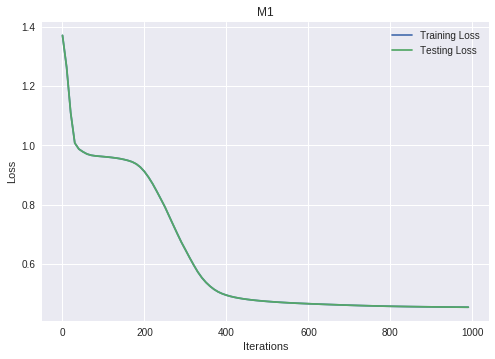

In [6]:
name1 = 'M1'
name2 = 'M2'
name3 = 'M3'
name4 = 'M4'

param1 = get_minibatch(64, 30, 4, alpha = (1.0, 10.0, 1.0))
param2 = get_minibatch(64, 5, 29, alpha = (1.0, 10.0, 1.0))
param3 = get_minibatch(64, 30, 4, alpha = (1.3, 1.3, 1.3))
param4 = get_minibatch(64, 5, 29, alpha = (1.3, 1.3, 1.3))

modelM1 = Create_Train_LSTM(param1, name1, 8, True)

Model Name: M2
Compiling data...
Compiling model...
Training model...
Plotting metrics...


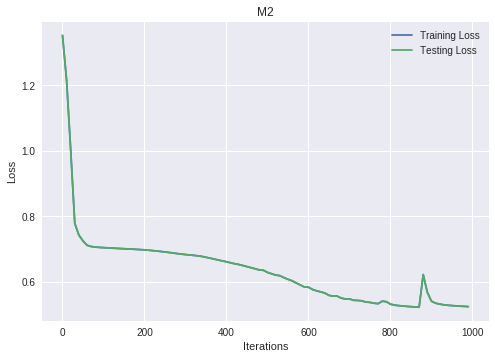

In [7]:
modelM2 = Create_Train_LSTM(param2, name2, 8, True)

Model Name: M3
Compiling data...
Compiling model...
Training model...
Plotting metrics...


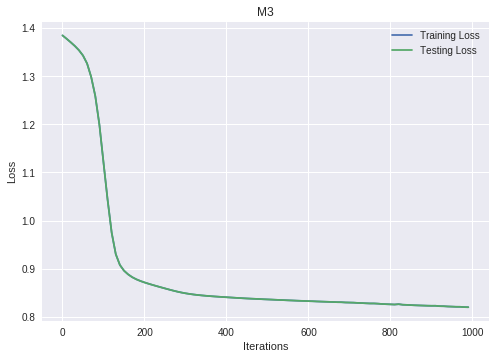

In [8]:
modelM3 = Create_Train_LSTM(param3, name3, 8, True)

Model Name: M4
Compiling data...
Compiling model...
Training model...
Plotting metrics...


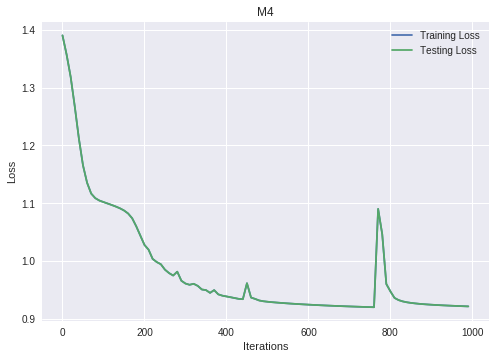

In [9]:
modelM4 = Create_Train_LSTM(param4, name4, 32, True)

3) **Analysis results (10 pts)**

In this section, we will investigate what the models have actaully learnt. For this we will generate a few test sequences:
* *Test sequence 1*: generate a test sequence that changes tasks every T=5 steps from a a Dirichlet with $\alpha = (1.,10.,1.,)$.
* *Test sequence 2*: generate a test sequence that changes tasks every T=5 steps from a a Dirichlet with $\alpha = (1.3,1.3,1.3,)$.
* *Test sequence 3*: generate a test sequence that 'changes tasks' every T=5 steps, but keep sampling according to the same probability vector $\textbf{p}=(0,0,1)$ (You can use any of the extreme here).
* *Test sequence 4*: generate a test sequence that changes tasks every T=5 steps from a a Dirichlet with $\alpha = (0.2,0.2,0.2)$.

i) Test the preformance of M1 and M3 and these test sequences. In addition plot the actual prediction the models do (probability of symbols over time). This should give you more insight in what the model does. Does this correspond or contradict your previous intuitions? **[5 pts]**

ii) Repeat the same procedure for task length $T=30$ and models M2 and M4. What do you observe? How do M2 and M4 compare to each other and how to their compare to M1 and M3 (the models trained on the shorter task length). **[5 pts]**


**Q3i Answer: **

M1

>- Overall for Model 1 we can see the model predict the $RESET$ symbol correctly for all of the test sequences. But notice how the model predicts with large probability symbol 2 which highlights poor generalisation. As a result this agrees with our intuition for the test sequence 1. Also on test sequence 2 we are predicting with large probability symbol 2, again agrees with intuition that if we have a more uniform $\alpha$ we should have the probabilities to be more uniform but we are shown otherwise.

M3

>-  Predicts $RESET$ symbol correctly for all test sequences. It is generalising well because when we compare M1 with M3 on test sequence 2 we see that M3 has a roughly uniform probability driven by how we set the parameters before and therefore agrees with my intuition stated before. Overall M3 generalises pretty well across the test sequences.

In [0]:
# Generate the test sequences
test_seq_1 = get_minibatch(64, 30, 4, alpha=(1.0,10.0,1.0))
test_seq_2 = get_minibatch(64, 30, 4, alpha=(1.3,1.3,1.3))
test_seq_3 = get_minibatch(64, 30, 4, p=(0,0,1))
test_seq_4 = get_minibatch(64, 30, 4, alpha=(0.2,0.2,0.2))

In [0]:
# For model 1 we predict on the 4 test sequences
m1_eval_ts_1_pred = modelM1.predict(test_seq_1[:,:-1,:])
m1_eval_ts_2_pred = modelM1.predict(test_seq_2[:,:-1,:])
m1_eval_ts_3_pred = modelM1.predict(test_seq_3[:,:-1,:])
m1_eval_ts_4_pred = modelM1.predict(test_seq_4[:,:-1,:])

In [0]:
# For model 4 we predict on the 4 test sequences
m3_eval_ts_1_pred = modelM3.predict(test_seq_1[:,:-1,:])
m3_eval_ts_2_pred = modelM3.predict(test_seq_2[:,:-1,:])
m3_eval_ts_3_pred = modelM3.predict(test_seq_3[:,:-1,:])
m3_eval_ts_4_pred = modelM3.predict(test_seq_4[:,:-1,:])

In [0]:
def plot(ts1,ts2,ts3,ts4, name, idx):
  fig = plt.figure(figsize=(15, 5))
     
  plt.plot(np.arange(idx), ts1[0,:idx,0], 'red')
  plt.plot(np.arange(idx), ts2[0,:idx,1], 'green')
  plt.plot(np.arange(idx), ts3[0,:idx,2], 'blue')
  plt.plot(np.arange(idx), ts4[0,:idx,3], 'purple')
  plt.xlabel('Time steps')
  plt.ylabel('Probability')
  plt.title(name +' '+ 'Test Sequence')
  plt.legend(("Symbol 1","Symbol 2","Symbol 3","Reset"), loc = 'best', bbox_to_anchor=(1,1))

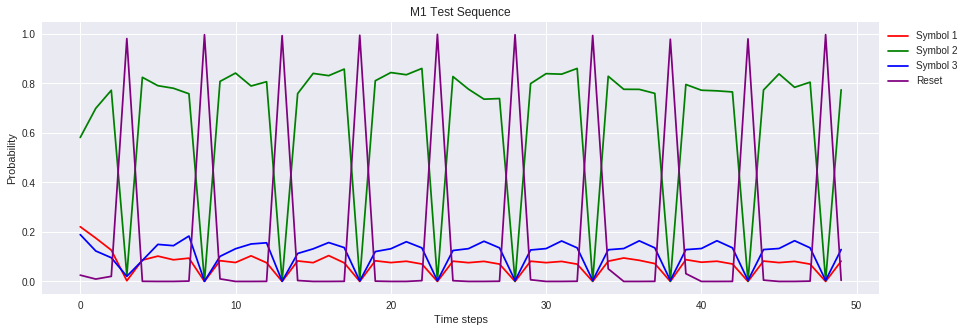

In [21]:
plot(m1_eval_ts_1_pred,m1_eval_ts_2_pred,m1_eval_ts_3_pred,m1_eval_ts_4_pred, name1, 50)

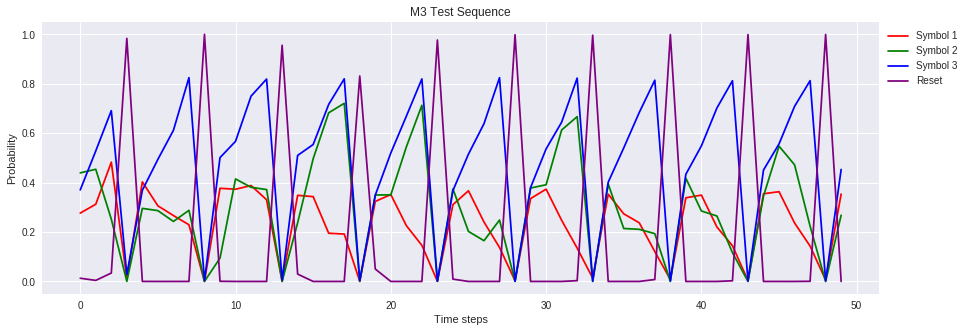

In [22]:
plot(m3_eval_ts_1_pred,m3_eval_ts_2_pred,m3_eval_ts_3_pred,m3_eval_ts_4_pred, name3, 50)

** Q3ii Answers:**

M2

>- Again as stated previously M2 has large probablility for symbol 2 which makes sense for test sequence 1. But doesn't make much sense for the rest of the test sequences. When comparing to M3, M3 is overall better and generalises well across the test sequences.

M4

>- M4 predicts the $RESET$ symbol well but is very isolated in a sense that it doesn't generalise well for test sequence 1 towards the end of time. Similar results for test sequence 2 and 4.

Overall the performance between the models trained on different lengths of time are similar to some degree. We that M1 and M2 do not generalise well and are explained in the intuitions in the previous question.

In [0]:
# Generate more test sequences
test_seq_1_2 = get_minibatch(64, 5, 29, alpha=(1.0,10.0,1.0))
test_seq_2_2 = get_minibatch(64, 5, 29, alpha=(1.3,1.3,1.3))
test_seq_3_2 = get_minibatch(64, 5, 29, p=(0,0,1))
test_seq_4_2 = get_minibatch(64, 5, 29, alpha=(0.2,0.2,0.2))

In [0]:
# For model 2 we predict on the test sequences
m2_eval_ts_1_pred_2 = modelM2.predict(test_seq_1_2[:,:-1,:])
m2_eval_ts_2_pred_2 = modelM2.predict(test_seq_2_2[:,:-1,:])
m2_eval_ts_3_pred_2 = modelM2.predict(test_seq_3_2[:,:-1,:])
m2_eval_ts_4_pred_2 = modelM2.predict(test_seq_4_2[:,:-1,:])

In [0]:
# For model 4 we predict on the test sequences 
m4_eval_ts_1_pred_2 = modelM4.predict(test_seq_1_2[:,:-1,:])
m4_eval_ts_2_pred_2 = modelM4.predict(test_seq_2_2[:,:-1,:])
m4_eval_ts_3_pred_2 = modelM4.predict(test_seq_3_2[:,:-1,:])
m4_eval_ts_4_pred_2 = modelM4.predict(test_seq_4_2[:,:-1,:])

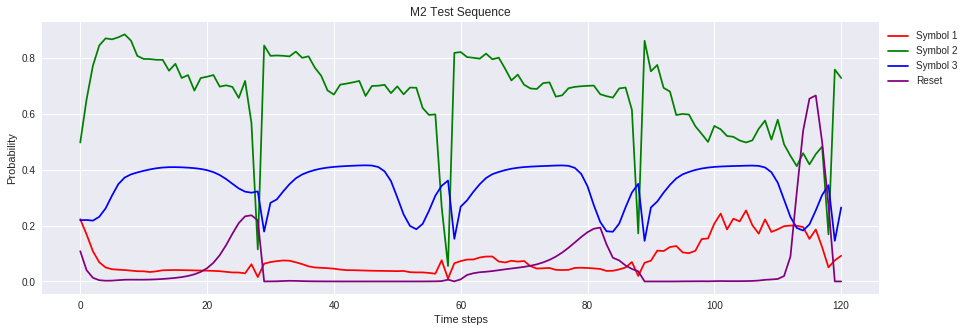

In [26]:
plot(m2_eval_ts_1_pred_2, m2_eval_ts_2_pred_2, m2_eval_ts_3_pred_2, m2_eval_ts_4_pred_2, name2, 121)

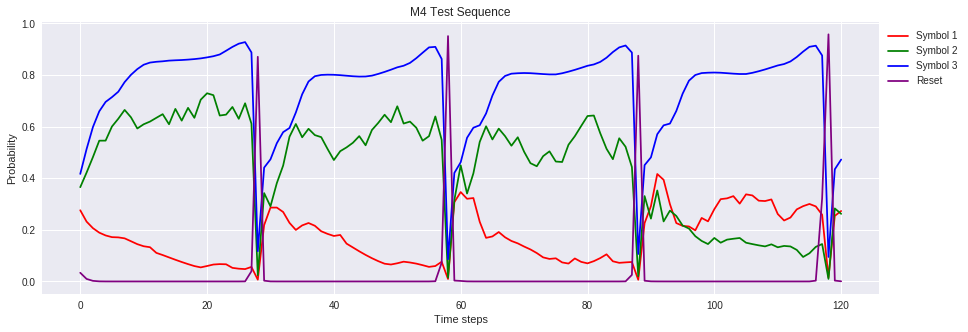

In [27]:
plot(m4_eval_ts_1_pred_2, m4_eval_ts_2_pred_2, m4_eval_ts_3_pred_2, m4_eval_ts_4_pred_2,  name4, 121)

## 4) **Comparison to the Bayesian update (14 pts)**


Going back to the generative process in the task description. For a given prior, for each the mini-tasks (selecting/sampling a $\textbf{p}$), one could compute the Bayesian posterior at each time step.  We start with a prior and every time we observe a symbol with update our posterior over the parameters
 $\textbf{p}$ given the data. We do this every time step, till we reach the RESET symbol which marks the end of the task. Then we start again, from the prior.
,

i) Derive the posterior update for each time step. (Hint: since the two distribution are conjugates or each other, the posterior has a closed form). **[2 pts]**

ii) Implement this posterior update and use it to infer the probabilities over the next symbol, for the previously generated test sequences. This will tell you, what the inferred probabilities would be, if we knew the structure of the model, the prior and that the reset symbol means the tasks has finished and we should reset our estimate to the prior. (For test sequence 1 and 2, use the prior that generated them, for test sequence 3 and 4 compute the updates starting from both priors) **[5 pts]**

iii) Compare this to what the LSTM predictions are. What do you observe? What are the failure cases -- can you explain why this might happen? (For test sequence 1 and 2, use the prior that generated them, for test sequence 3 and 4 compute the updates starting from both priors). **[7 pts]**
 
For this analysis, only consider $T=30$ and respectively models M2 and M4.


4i) Since one of task of generating a probability  $ \mathbf{p} \sim Dirichlet(\mathbf{\alpha})$ and the symbol has distribution $ X \sim Categorical(3, \mathbf{p}) = Categorical(\mathbf{p} )$. By applying a pair of **conjugate distributions** we can form a closed posterior probability which is:

> - Let $f(\theta | D) = Dirichlet(\alpha) $ Then $ f(\theta | D) \propto f(\theta,D)  $ where $D$ is the Dataset in context of the task

$$ f(\mathbf{p} | \alpha) \prod_{x_i \in X}^{} f(x_i | \mathbf{p}) \propto \prod_{i=1}^{3}p_i^{\alpha_i-1}\prod_{x_j \in X}\prod_{i=1}^{3}p_i^{\mathbb{{1}\{}x_j = i \}} \text{ where } x_j \in X $$ 

$$ = \prod_{i=1}^{3}p_i^{\alpha_i-1 + \sum_{x_i \in X} {\mathbb{{1}\{}x_j = i \}} } $$

> - Since both these distributions are conjugate priors of each other we get a $Dirichlet(\alpha')$ distribution where 
$ \alpha'_i = \alpha_i + \sum_{x_j \in X} {\mathbb{{1}\{}x_j = i \}}$. An example is $\alpha'_1 = \alpha_1 + x_1$


>- Therefore the posterior update will be 
$$ f( X = x | D) = \int f(X = x| \theta)f(\theta|D)d\theta = \int f(X = x| \mathbf{p})f(\mathbf{p} | D) d\mathbf{p}$$
$$ = \int p_x \frac{\Gamma(\sum_{j=1}^{3}\alpha'_j )}{\prod_{j=1}^{3}\Gamma(\alpha'_j)}\prod_{j=1}^{3}p_j^{{\mathbb{1} \{} x=j \} + \alpha'_j -1} d\mathbf{p}$$

$$= \frac{\Gamma(\sum_{j=1}^{3}\alpha'_j )}{\prod_{j=1}^{3}\Gamma(\alpha'_j)} \int \prod_{j=1}^{3}p_j^{{\mathbb{1} \{} x=j \} + \alpha'_j -1}d\mathbf{p}$$

$$ = \frac{\Gamma(\sum_{j=1}^{3}\alpha'_j )}{\prod_{j=1}^{3}\Gamma(\alpha'_j)} \frac{\prod_{j=1}^{3}\Gamma({\mathbb{1} \{} x=j \} + \alpha'_j )}{\Gamma(1 + \sum_{j=1}^{3}\alpha'_j)} $$

$$= \frac{\alpha'_{x}}{\sum_{j=1}^{3}\alpha'_j}$$

In [0]:
def Bayesian_Update1(alpha1, seq, name):
  # Initialise size to put the posteior probs to be plotted
  posterior_placeholder = np.zeros(shape = [150,4])
  # Applying the posterior update from the previous question
  alpha = alpha1
  for idx in range(150):
    
    symb_in_seq = seq[0,idx,:]
    argmax_index = np.argmax(symb_in_seq)
    
    if argmax_index == 3:
      alpha = [1.1, 1.1, 1.1]
      posterior_placeholder[idx, 3] = 1
      
    else:
      alpha[argmax_index] += 1
      posterior_placeholder[idx,:3]  = alpha / np.sum(alpha)
  
  # Plotting the posterior probs
  plt.figure(figsize=(10, 5))
  plt.plot(np.arange(150),posterior_placeholder[:,0],'red')
  plt.plot(np.arange(150),posterior_placeholder[:,1],'green')
  plt.plot(np.arange(150),posterior_placeholder[:,2],'blue')
  plt.plot(np.arange(150),posterior_placeholder[:,3],'purple')
  plt.legend(["Symbol 1","Symbol 2","Symbol 3","Reset"], loc='best', bbox_to_anchor=(1,0.5))
  plt.xlabel('Time steps')
  plt.ylabel('Probability')
  plt.title(name)
  
def Bayesian_Update2(alpha1, seq, name):
  # Initialise size to put the posteior probs to be plotted
  posterior_placeholder = np.zeros(shape = [150,4])
  # Applying the posterior update from the previous question
  alpha = alpha1
  for idx in range(150):
    
    symb_in_seq = seq[0,idx,:]
    argmax_index = np.argmax(symb_in_seq)
    
    if argmax_index == 3:
      alpha = [1., 10., 1.]
      posterior_placeholder[idx, 3] = 1
      
    else:
      alpha[argmax_index] += 1
      posterior_placeholder[idx,:3]  = alpha / np.sum(alpha)
  
  # Plotting the posterior probs
  plt.figure(figsize=(10, 5))
  plt.plot(np.arange(150),posterior_placeholder[:,0],'red')
  plt.plot(np.arange(150),posterior_placeholder[:,1],'green')
  plt.plot(np.arange(150),posterior_placeholder[:,2],'blue')
  plt.plot(np.arange(150),posterior_placeholder[:,3],'purple')
  plt.legend(["Symbol 1","Symbol 2","Symbol 3","Reset"], loc='best', bbox_to_anchor=(1,0.5))
  plt.xlabel('Time steps')
  plt.ylabel('Probability')
  plt.title(name)

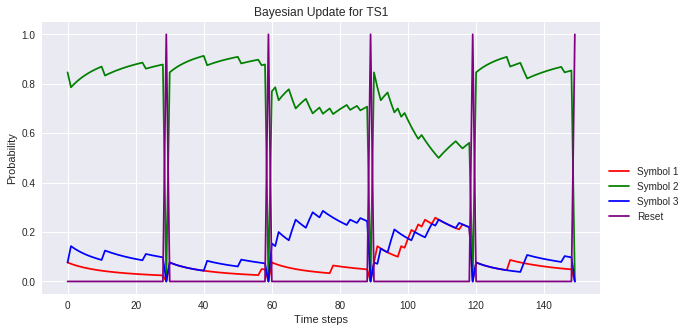

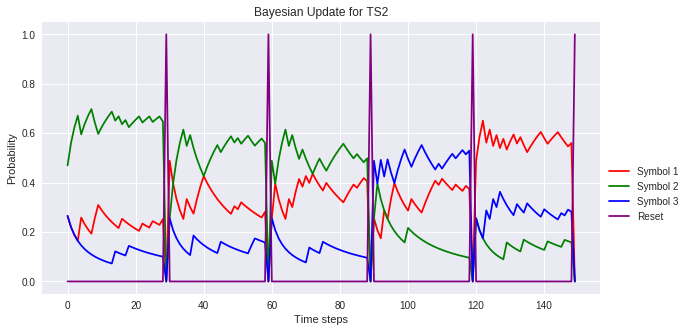

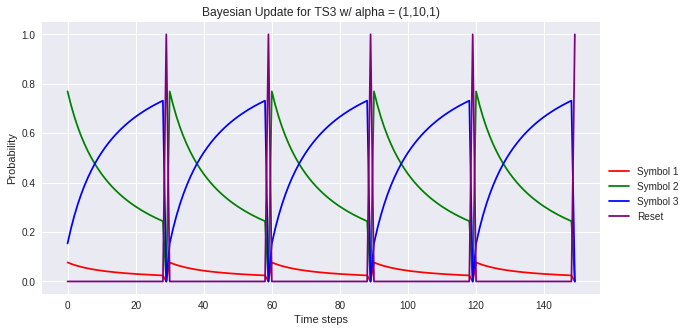

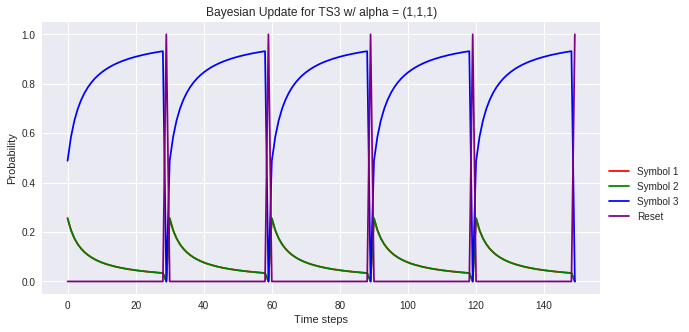

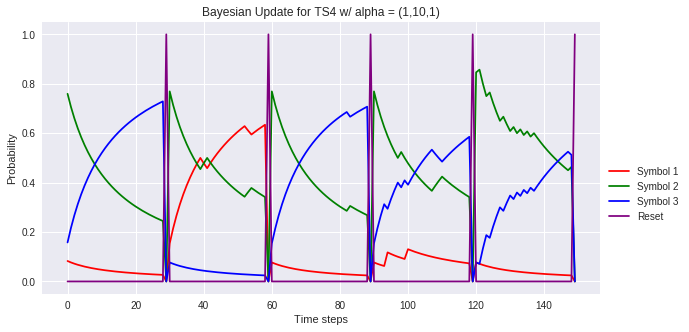

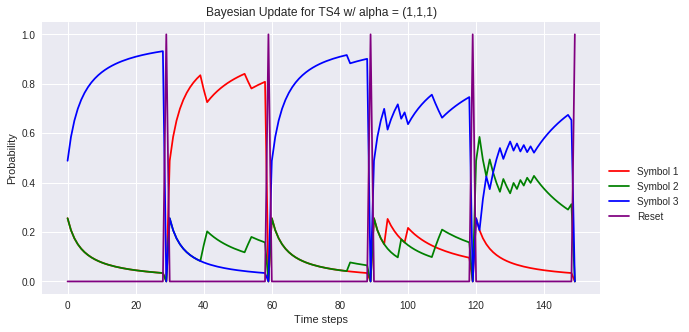

In [29]:
Bayesian_Update2([1., 10., 1.], test_seq_1_2, 'Bayesian Update for TS1')
Bayesian_Update1([1.3, 1.3, 1.3], test_seq_2_2, 'Bayesian Update for TS2')
Bayesian_Update2([1., 10., 1.], test_seq_3_2, 'Bayesian Update for TS3 w/ alpha = (1,10,1)')
Bayesian_Update1([1.1, 1.1, 1.1], test_seq_3_2, 'Bayesian Update for TS3 w/ alpha = (1,1,1)')
Bayesian_Update2([1.1, 10.1, 1.1], test_seq_4_2, 'Bayesian Update for TS4 w/ alpha = (1,10,1)')
Bayesian_Update1([1.1, 1.1, 1.1], test_seq_4_2, 'Bayesian Update for TS4 w/ alpha = (1,1,1)')

>- test sequence 1 with alpha = (1,10,1) we see high posterior updates estimate for symbol 2 - shows similar results to without updates.

>- test sequence 2 since the prior has another form we therefore see variance between resets - caused by posterior updates. For example if we see a symbol two times sequentially then we update posterior according to what was observed. As a result the updates are quite dependent on the past observations since those observations are generated almost uniformly.

>- test sequence 3, alpha = (1,10,1), we see that for every reset (purple line) the same trend in predictions and at the start of the sequence (as in after reset symbol) we see a large probability for symbol 2 and slowly decreases toards the end of the sequence till the next $RESET$ is initialised. This is somewhat different to what Model 2 produced earlier and is more smoother. 

>- test sequence 3, alpha = (1.1,1.1,1.1), we see that the model was able to predict symbol 3 very well as there is a high probability. In this example we start with a lower probability for symbol 2 because we have a more uniform prior and is very similar to model 4 on test sequence 3.

>- test sequence 4, alpha = (1,10,1),  we see something quite similar to M4 on the same test sequence despite having a different $\alpha$ the updates are adjusting towards what M4 looks like. An example of this is  where we see variance between iteration 90-110, both of these clearly highlight this. 

>- test sequence 4, alpha = (1.1,1.1,1.1), shows a smoother version of what M4 - test sequence 4 which is expected.

Overall i think failure cases happen on test sequences when there is a completely different data generation methods - so things such as $\mathbf{p}, \alpha$. An example is if the prior were to be uniform there is always a chance that the sequence generated by the distribution could appear to have a large probability for a particular symbol. As a result when updating the posterior rather than updating towards a uniform prior we are updating towards a skewed distribution because of pure chance. It therefore takes some number of iterations to update the posterior to the towards something that is representative. An example of this is test sequence 4, alpha = (1.1,1.1,1.1,1.1) between iteration 90-110.